In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Code Snippets from the Book

In [1]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.168692,0.024908,0.008119,01:19


epoch,train_loss,valid_loss,error_rate,time
0,0.054716,0.009363,0.004060,01:24


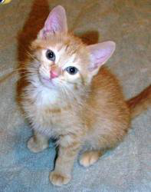

In [8]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *


img = PILImage.create(image_cat())
img.to_thumb(192)

In [9]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [15]:
is_cat,_,probs = learn.predict(uploader.data[0])
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000001


In [2]:
def is_cat(x): return x[0].isupper()

In [8]:
from fastai.vision.all import *
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

NameError: name 'path' is not defined

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.879908,2.479931,00:05


epoch,train_loss,valid_loss,time
0,2.043600,1.757185,00:02
1,1.755651,1.339561,00:02
2,1.524253,1.130049,00:02
3,1.340772,1.034363,00:02
4,1.194985,0.861333,00:02
5,1.070277,0.792724,00:02
6,0.971411,0.779256,00:02
7,0.896724,0.772858,00:02


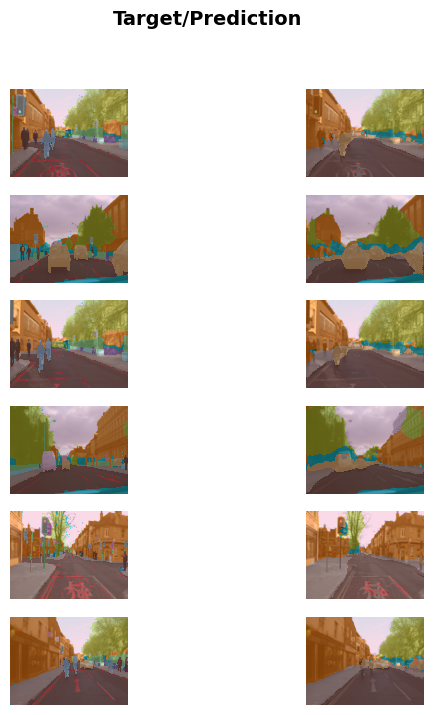

In [3]:
learn.show_results(max_n=6, figsize=(7,8))


In [4]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.466263,0.402046,0.818960,02:45


epoch,train_loss,valid_loss,accuracy,time
0,0.314671,0.270917,0.884280,05:54
1,0.235644,0.203321,0.922600,05:55
2,0.190717,0.186488,0.929800,05:55
3,0.153583,0.190543,0.930480,05:55


In [6]:
doc(learn.fine_tune)

Learner.fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, *, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False, start_epoch=0)
Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [1]:
1+1

2

# Exercises

These exercises are from chapter one of the 
[fast.ai book](https://fastai.github.io/fastbook2e/intro.html#questionnaire)

1. Do you need these for deep learning?

* Lots of math T / F - F
* Lots of data T / F - F
* Lots of expensive computers T / F - F
* A PhD T / F - F

2. Name five areas where deep learning is now the best in the world.

* Computer vision
* Robotics
* Medicine
* NLP
* Recommendation systems

3. What was the name of the first device that was based on the principle of the artificial neuron?

* Mark I Perceptron

4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?

* A set of processing units
* A state of activation
* An output function for each unit
* A pattern of connectivity among units
* A propagation rule for propagating patterns of activities through the      network of connectivities
* An activation rule for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit
* A learning rule whereby patterns of connectivity are modified by experience
* An environment within which the system must operate

5. What were the two theoretical misunderstandings that held back the field of neural networks?

* Practice such networks were often too big.
* And too slow to be useful.

6. What is a GPU?

* Graphics Processing Unit (GPU), also known as a graphics card, is a special kind of processor in your computer that can handle thousands of single tasks at the same time.

7. Open a notebook and execute a cell containing: 1+1. What happens?

* It prints the number 2.

8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.

* Completed

9. Complete the Jupyter Notebook online appendix.

* Completed 

10. Why is it hard to use a traditional computer program to recognize images in a photo?

* It is difficult to tell the computer the exact steps required to recognize images, just like human beings it is done from sub-consciously 

11. What did Samuel mean by “weight assignment”?

* Weights are just variables and a weight assignment is a particular choice of values for those variables. The programs weight assignments are other values that define how the program will operate.

12. What term do we normally use in deep learning for what Samuel called “weights”?

* The term weights is reserved for particular type of model parameter.

13. Draw a picture that summarizes Samuel’s view of a machine learning model.

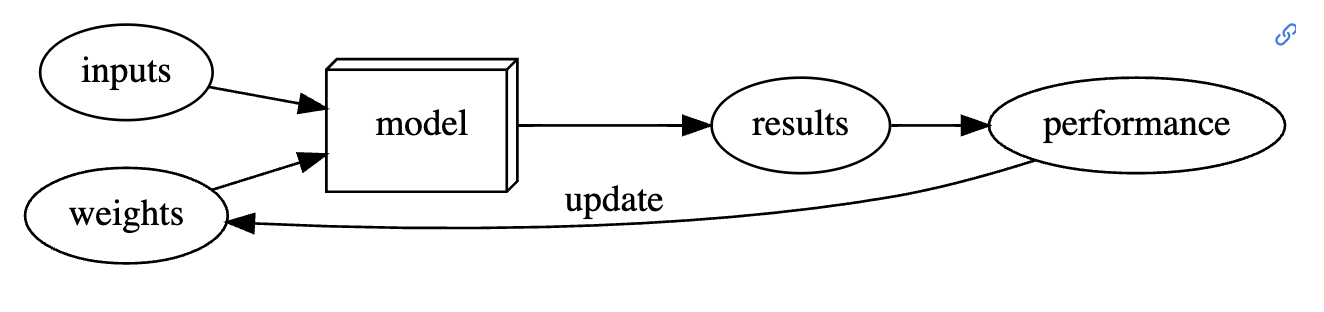

14. Why is it hard to understand why a deep learning model makes a particular prediction?

* Because it almost acts like a black box and because the weights are constantly changing it is hard to understand which model parameters are making the changes to the model.

15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?

* Universal Approximation theorem

16. What do you need in order to train a model?

* Data
* Similar patterns that might be seen in the input data.
* Labels for the input data as well stating what the data is for images an example would be labeling which is a cat and which is not.

17. How could a feedback loop impact the rollout of a predictive policing model?

* A feedback loop would focus on arrests that have been made in the past, thereby not actully focusing on predicting crime at had but rather predicting arrests therefore partially simply reflecting biases  in existing policing processes. 

* The officers would then focus on increasing policing in those areas which would still then end up in increased arrests in those areas.

* Data on these additional arrests would be fed back into the retrain of the future versions of this model.

18. Do we always have to use 224×224-pixel images with the cat recognition model?

* No, but the size of image might make the speed of the model to be faster or slower depending at the benefit of increased accuracy of results.

19. What is the difference between classification and regression?

* Classification is when you are trying to predict a class or category from a discrete amount of possibilities.

* Regression deals with trying to predict on or more numeric quantites such as temperature, location, energy consumption.

20. What is a validation set? What is a test set? Why do we need them?

* Validation Set is the split of the data that you use to validate your model predictions, essentially you can use this set to experiment with the trained model make changes and see if the model 

* Test Set is the final set before production and is useed to evaluate the final model.

* Having them both is to ensure that the model does not memorise the data, this would tend to create and overfit and might decrease the accuracy of the model.

21. What will fastai do if you don’t provide a validation set?

* It will assign a default of 0.2 of the data as a validation set.

22. Can we always use a random sample for a validation set? Why or why not?

* No, sometimes the data might have a time series where taking a random sample might not be a representative of the business use case as you are trying to historical data to build a model for future use.

23. What is overfitting? Provide an example.

* Overfitting is when the model starts to memorise parts of the data rather than form general patterns in the data.


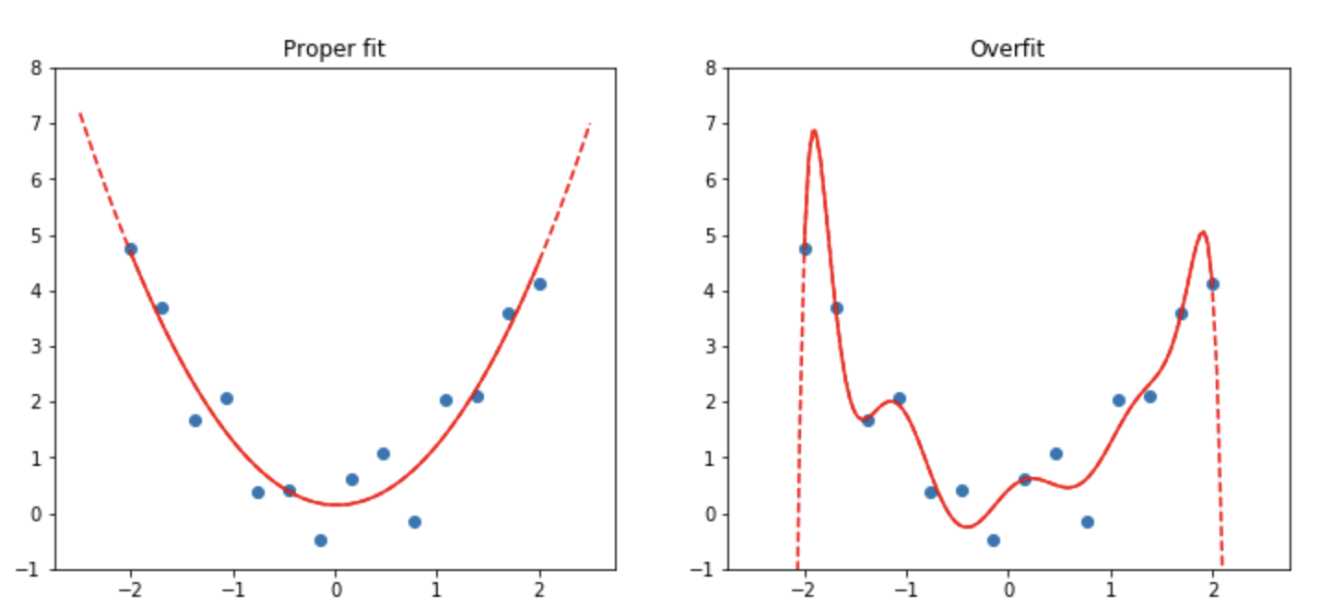

24. What is a metric? How does it differ from “loss”?

* A metric is a fucntion that measures the quality of the models predictions using the validation set.

* The concept of loss sounds similar but is used to meaure the of performance that the training system can use to update the weights automatically.

25. How can pretrained models help?

* Pretrained models can help you save money, time, less data and give more accurate models.

26. What is the “head” of a model?

* When using a pretrained model,the function vison_learner from the fastai package will remove the last layer that was used to specifically customise the original task. It will then replace it with one or more new layers with randomized weights.

27. What kinds of features do the early layers of a CNN find? How about the later layers?

* In early layers, what we can see is that the model has discovered weights that represent diagonal, horizontal, and vertical edges, as well as various different gradients. which are the basic blocks for computer vision.

* In later layers it starts to recognise higher level concepts and features.

28. Are image models only useful for photos?

* No they are not they can also be useful by converting certain data to images and using the model on that image. 

29. What is an “architecture”?

* The template of the model that you are trying to fit; the actual mathematical function that we're passing the input data and parameters to.

30. What is segmentation?

* This is when a model can recognize the content of every individual pixel in an image.

31. What is y_range used for? When do we need it?

* This is the range that you tell fastai to have for the output. You use it when the expected output is continuous number instead of a category

32. What are “hyperparameters”?

* These are model choices regarding architecture, learning rates, data augmentation strategies. They are higher-level choices that govern the weight parameters. 

33. What’s the best way to avoid failures when using AI in an organization?

* To understand what test and validation sets are and why they're important.





# Further Research

Each chapter also has a “Further Research” section that poses questions that aren’t fully answered in the text, or gives more advanced assignments. Answers to these questions aren’t on the book’s website; you’ll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?

* While CPUs can process many general tasks in a fast, sequential manner, GPUs use parallel computing to break down massively complex problems into multiple smaller simultaneous calculations. This makes them ideal for handling the massively distributed computational processes required for machine learning.

* CPUs are less efficient than GPUs for deep learning because they process tasks in order one at a time. As more data points are used for input and forecasting, it becomes more difficult for a CPU to manage all of the associated tasks.

* Deep learning requires a great deal of speed and high performance and models learn more quickly when all operations are processed at once. Because they have thousands of cores, GPUs are optimized for training deep learning models and can process multiple parallel tasks up to three times faster than a CPU.

* [CPU vs GPU Blog post](https://blog.purestorage.com/purely-informational/cpu-vs-gpu-for-machine-learning/#:~:text=While%20CPUs%20can%20process%20many,processes%20required%20for%20machine%20learning.)



2. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.

* For example, in a fraud detection system, users with a high risk score may be required to complete additional verification. If the verification is effective and leads to fraudulent users giving up without solving it, then those users will never get the opportunity to actually commit fraud and get labeled as such.Without explicitly handling this, the model’s future training data will be biased, and will only include positively labeled data points on fraudulent users who either 1) solved the verification challenge, or 2) were below the model’s threshold and were never challenged. This gradually biases the model’s training data towards more “difficult” fraud over time, as the “easy” fraud gets stopped by the intervention. It also decreases the amount of (already scarce) positive examples in the training data, as the existing system is likely to prevent most fraud from occurring.


* Search ranking systems typically use user interaction logs to create labeled training data. Under a binary classification framing, if a user decided to interact with something, then the label is positive, and if not, the label is negative. This labeling method leads to bias because the items that were ranked highly by the previous model are far more likely to be interacted with than other pieces of content, even if the highly ranked items were not actually relevant. Without adjusting for bias, this will lead the model to largely just memorize its past decision logic (and therefore its past mistakes), rather than learning the users’ true tastes.

* There is also positive feedback loop On any platform involving content ranking or shopping, there is typically some form of content ranking system that decides which items best match the user’s search query or historical engagement. However, in many cases, the algorithm’s suggestions are not perfect, and users may choose to either engage with items that were not recommended, or engage with low ranked items over high ranked ones. The logs from these user interactions provide the ranking system with ground truth for what the user was actually interested in. When a user interacts with something that was not ranked highly by the algorithm, it provides the system with valuable feedback for its next retraining. In addition, the more user interaction data that the platform has for a user, the better it is able to build profiles for their specific interests and target their specific needs.


# is 